In [16]:
'''
@File    :   thend.ipynb
@Time    :   2023/07/23 14:57:22
@Author  :   Ravi K.
@Desc    :   A notebook for testing combination of everything we have done.
'''

'\n@File    :   thend.ipynb\n@Time    :   2023/07/23 14:57:22\n@Author  :   Ravi K.\n@Desc    :   A notebook for testing combination of everything we have done.\n'

In [17]:
import final_script as fs
import numpy as np
import processing_functions as pf
import matplotlib.pyplot as plt
import os
import glob
from scipy.stats import skewnorm
from astropy.io import fits
from astropy.stats import sigma_clipped_stats
import matplotlib.backends.backend_pdf
import matplotlib
params={
    'text.usetex':True,
    'font.family':'serif',
    'figure.dpi':150,    
    'xtick.minor.visible':True,
    'ytick.minor.visible':True,
    'xtick.top':True,
    'ytick.left':True,
    'ytick.right':True,
    'xtick.direction':'out',
    'ytick.direction':'out',
    'xtick.minor.size':2.5,
    'xtick.major.size':5,
    'ytick.minor.size':2.5,
    'ytick.major.size':5,
    'axes.axisbelow':True
}
matplotlib.rcParams.update(params)

In [18]:
# snr, outliers, grb_mask, grb_snr = fs.find_grb("/home/ravioli/astro/ksp/grb/GRB190928A/1s", 307372337.0, 2)[0]

In [19]:
# t, *_ = fs.quadratic_detrend_trigger("/home/ravioli/astro/ksp/grb/GRB190928A/1s/3_bins/20-60/AS1A06_002T02_9000003206_21631cztM0_level2_quad_clean_Q0.lc", 1702)
# grb = np.zeros_like(t['RATE'])
# plt.figure(figsize=(10,7))
# plt.subplot(2,1,1)
# grb[outliers] = snr[0]
# plt.plot(t['TIME'], grb, alpha=0.6, color='red', label='20-60keV')
# grb[outliers] = snr[1]
# plt.plot(t['TIME'], grb, alpha=0.6, color='blue', label='60-100keV')
# grb[outliers] = snr[2]
# plt.plot(t['TIME'], grb, alpha=0.6, color='green', label='100-200keV')
# plt.title("GRB190928A")
# plt.xlabel("Outliers")
# plt.ylabel("SNR")
# plt.legend()
# plt.subplot(2,1,2)
# grb[outliers] = 0
# grb[outliers[grb_mask]] = grb_snr
# plt.plot(t['TIME'], grb, alpha=0.6, color='slateblue', label='20-200keV')
# plt.legend()
# plt.tight_layout()
# plt.show()

In [20]:
# snr, outliers, grb_mask, grb_snr = fs.find_grb("/home/ravioli/astro/ksp/grb/GRB210709A/1s", 363502145.0, 2.5)[1]

In [21]:
# detrended, raw, trend, *_ = fs.quadratic_detrend_trigger("/home/ravioli/astro/ksp/grb/GRB210709A/1s/3_bins/20-60/AS1A10_073T02_9000004522_31247cztM0_level2_quad_clean_Q1.lc", 3513)
# grb = np.zeros_like(detrended['RATE'])
# plt.figure(figsize=(10,7), dpi=150)
# plt.subplot(2,1,1)
# grb[outliers] = snr[0]
# plt.plot(detrended['TIME'], grb, alpha=0.6, color='red', label='20-60keV')
# grb[outliers] = snr[1]
# plt.plot(detrended['TIME'], grb, alpha=0.6, color='blue', label='60-100keV')
# grb[outliers] = snr[2]
# plt.plot(detrended['TIME'], grb, alpha=0.6, color='green', label='100-200keV')
# plt.title("GRB210709A")
# plt.xlabel("Outliers")
# plt.ylabel("SNR")
# plt.legend()
# plt.subplot(2,1,2)
# grb[outliers] = 0
# grb[outliers[grb_mask]] = grb_snr
# plt.plot(detrended['TIME'], grb, alpha=0.6, color='slateblue', label='20-200keV')
# plt.legend()
# plt.tight_layout()
# plt.show()

In [22]:
data = fits.getdata("/home/ravioli/astro/ksp/grb/GRB210709A/1s/master_lc/AS1A10_073T02_9000004522_31247cztM0_level2_quad_clean_Q3.lc")
trigger_times = np.concatenate((np.linspace(363498633.5+500, 363503852.5-100, 5), np.linspace(363504933.5+100, 363506305.5-100, 2)))
print(data['TIME'][0], data['TIME'][fs.get_saa_indices(data)[0]], data['TIME'][fs.get_saa_indices(data)[-1]], data['TIME'][-1])

363498633.5 363503841.5 363504933.5 363506305.5


In [23]:
def plot_a_bunch_of_stuff(master_lcs, lc_paths, results, u, grb_name, trigger_time):
    fig_raw, ax_raw = plt.subplots(2, 2, figsize=(15, 10), sharex=True, sharey=True)
    fig_raw.set_tight_layout(True)
    fig_detrended, ax_detrended = plt.subplots(2, 2, figsize=(15, 10), sharex=True, sharey=True)
    fig_detrended.set_tight_layout(True)
    fig_mark_outlier, ax_mark_outlier = plt.subplots(2, 2, figsize=(15, 10), sharex=True, sharey=True)
    fig_mark_outlier.set_tight_layout(True)
    fig_snr_outlier, ax_snr_outlier = plt.subplots(4, 2, figsize=(15, 10), sharex=True, sharey=True)
    fig_snr_outlier.set_tight_layout(True)
    figs = [fig_raw, fig_detrended, fig_mark_outlier, fig_snr_outlier]
    
    for i in range(4):
        trigger_index = fs.get_trigger_index(master_lcs[i], trigger_time)
        detrended, raw, trend, *_ = fs.quadratic_detrend_trigger(master_lcs[i], trigger_index, polyorder=2)
        detrended20to60, *_ = fs.quadratic_detrend_trigger(lc_paths[i], trigger_index, polyorder=2)
        snr, outliers, grb_mask, grb_snr = results[i]
        ax_raw[i//2, i%2].plot(raw['TIME'], raw['RATE'], color='slateblue', label='Raw Count Rate', alpha=0.85)
        ax_raw[i//2, i%2].plot(raw['TIME'], trend, color='salmon', label='Trend', linewidth=2)
        ax_raw[i//2, i%2].fill_between(raw['TIME'], 0, raw['RATE'], color='slateblue', alpha=0.2)
        ax_raw[i//2, i%2].set_xlim(raw['TIME'][0], raw['TIME'][-1])
        ax_raw[i//2, i%2].set_xlabel("Time (s)")
        ax_raw[i//2, i%2].set_ylabel("Count Rate (counts/s)")
        ax_raw[i//2, i%2].set_title("Quadrant {}".format(i))
        if i == 1:
            ax_raw[i//2, i%2].legend()
        
        ax_detrended[i//2, i%2].plot(detrended['TIME'], detrended['RATE'], color='salmon', label='Detrended Count Rate')
        ax_detrended[i//2, i%2].set_xlim(detrended['TIME'][0], detrended['TIME'][-1])
        ax_detrended[i//2, i%2].set_xlabel("Time (s)")
        ax_detrended[i//2, i%2].set_ylabel("Count Rate (counts/s)")
        ax_detrended[i//2, i%2].set_title("Quadrant {}".format(i))
        if i == 1:
            ax_detrended[i//2, i%2].legend()
        
        ax_mark_outlier[i//2, i%2].plot(detrended20to60['TIME'], detrended20to60['RATE'], color='slateblue', label='20-60 keV')
        ax_mark_outlier[i//2, i%2].scatter(detrended20to60['TIME'][outliers], detrended20to60['RATE'][outliers], color='red', alpha=0.6, s=10*snr[0], label='Outliers')
        ax_mark_outlier[i//2, i%2].set_xlim(detrended20to60['TIME'][0], detrended20to60['TIME'][-1])
        ax_mark_outlier[i//2, i%2].set_xlabel("Time (s)")
        ax_mark_outlier[i//2, i%2].set_ylabel("Count Rate (counts/s)")
        ax_mark_outlier[i//2, i%2].set_title("Quadrant {}".format(i))
        if i == 1:
            ax_mark_outlier[i//2, i%2].legend()
        grb = np.zeros_like(detrended['RATE'])
        grb[outliers] = snr[0]
        ax_snr_outlier[i, 0].plot(detrended['TIME'], grb, alpha=0.6, color='red', label='20-60keV')
        grb[outliers] = snr[1]
        ax_snr_outlier[i, 0].plot(detrended['TIME'], grb, alpha=0.6, color='blue', label='60-100keV')
        grb[outliers] = snr[2]
        ax_snr_outlier[i, 0].plot(detrended['TIME'], grb, alpha=0.6, color='green', label='100-200keV')
        ax_snr_outlier[i, 0].set_xlim(detrended['TIME'][0], detrended['TIME'][-1])
        ax_snr_outlier[i, 0].set_title("Quadrant {} Outliers".format(i))
        ax_snr_outlier[i, 0].set_xlabel("Outliers")
        ax_snr_outlier[i, 0].set_ylabel("SNR")
        grb[outliers] = 0
        grb[outliers[grb_mask]] = grb_snr
        ax_snr_outlier[i, 1].plot(detrended['TIME'], grb, alpha=0.6, color='slateblue', label='20-200keV')
        possible_grbs = np.intersect1d(u, detrended['TIME'][outliers[grb_mask]])
        if len(possible_grbs) > 0:
            matched_times_mask = np.isin(detrended['TIME'], possible_grbs)
            u_mask = np.isin(u, possible_grbs)
            ax_snr_outlier[i, 1].scatter(u[u_mask], grb[matched_times_mask], color='red', alpha=0.6, s=2*grb[matched_times_mask], label='Potential GRBs')
        ax_snr_outlier[i, 1].set_xlim(detrended['TIME'][0], detrended['TIME'][-1])
        ax_snr_outlier[i, 1].set_title("Quadrant {} Potential GRBs".format(i))
        ax_snr_outlier[i, 1].set_xlabel("Outliers")
        ax_snr_outlier[i, 1].set_ylabel("SNR")
        if i == 0:
            ax_snr_outlier[i, 0].legend()
            ax_snr_outlier[i, 1].legend()

    fig_detrended.suptitle(f"Detrended Count Rate for {grb_name}")
    fig_raw.suptitle(f"Raw Count Rate and Trend for {grb_name}")
    fig_mark_outlier.suptitle(f"Detrended Count Rate + Outliers for {grb_name}")
    fig_snr_outlier.suptitle(f"SNR vs Outliers for {grb_name}")
    pdf = matplotlib.backends.backend_pdf.PdfPages(f"output_for_{grb_name}.pdf")
    for fig in figs:
        pdf.savefig(fig)
    pdf.close()
    plt.close()

Master light curve already exists at /home/ravioli/astro/ksp/grb/GRB210709A/1s/master_lc
Requested energy bins already exist at /home/ravioli/astro/ksp/grb/GRB210709A/1s/3_bins


No Potential GRB found for trigger time 363499133.5s.
Master light curve already exists at /home/ravioli/astro/ksp/grb/GRB210709A/1s/master_lc
Requested energy bins already exist at /home/ravioli/astro/ksp/grb/GRB210709A/1s/3_bins
No Potential GRB found for trigger time 363500288.25s.
Master light curve already exists at /home/ravioli/astro/ksp/grb/GRB210709A/1s/master_lc
Requested energy bins already exist at /home/ravioli/astro/ksp/grb/GRB210709A/1s/3_bins
No Potential GRB found for trigger time 363501443.0s.
Master light curve already exists at /home/ravioli/astro/ksp/grb/GRB210709A/1s/master_lc
Requested energy bins already exist at /home/ravioli/astro/ksp/grb/GRB210709A/1s/3_bins
Potential GRB found in Quadrant 0 at 363502147.5s with SNR 6.01!!!!
Potential GRB found in Quadrant 1 at 363502147.5s with SNR 7.2!!!!
Potential GRB found for trigger time 363502597.75s.
Master light curve already exists at /home/ravioli/astro/ksp/grb/GRB210709A/1s/master_lc
Requested energy bins already 

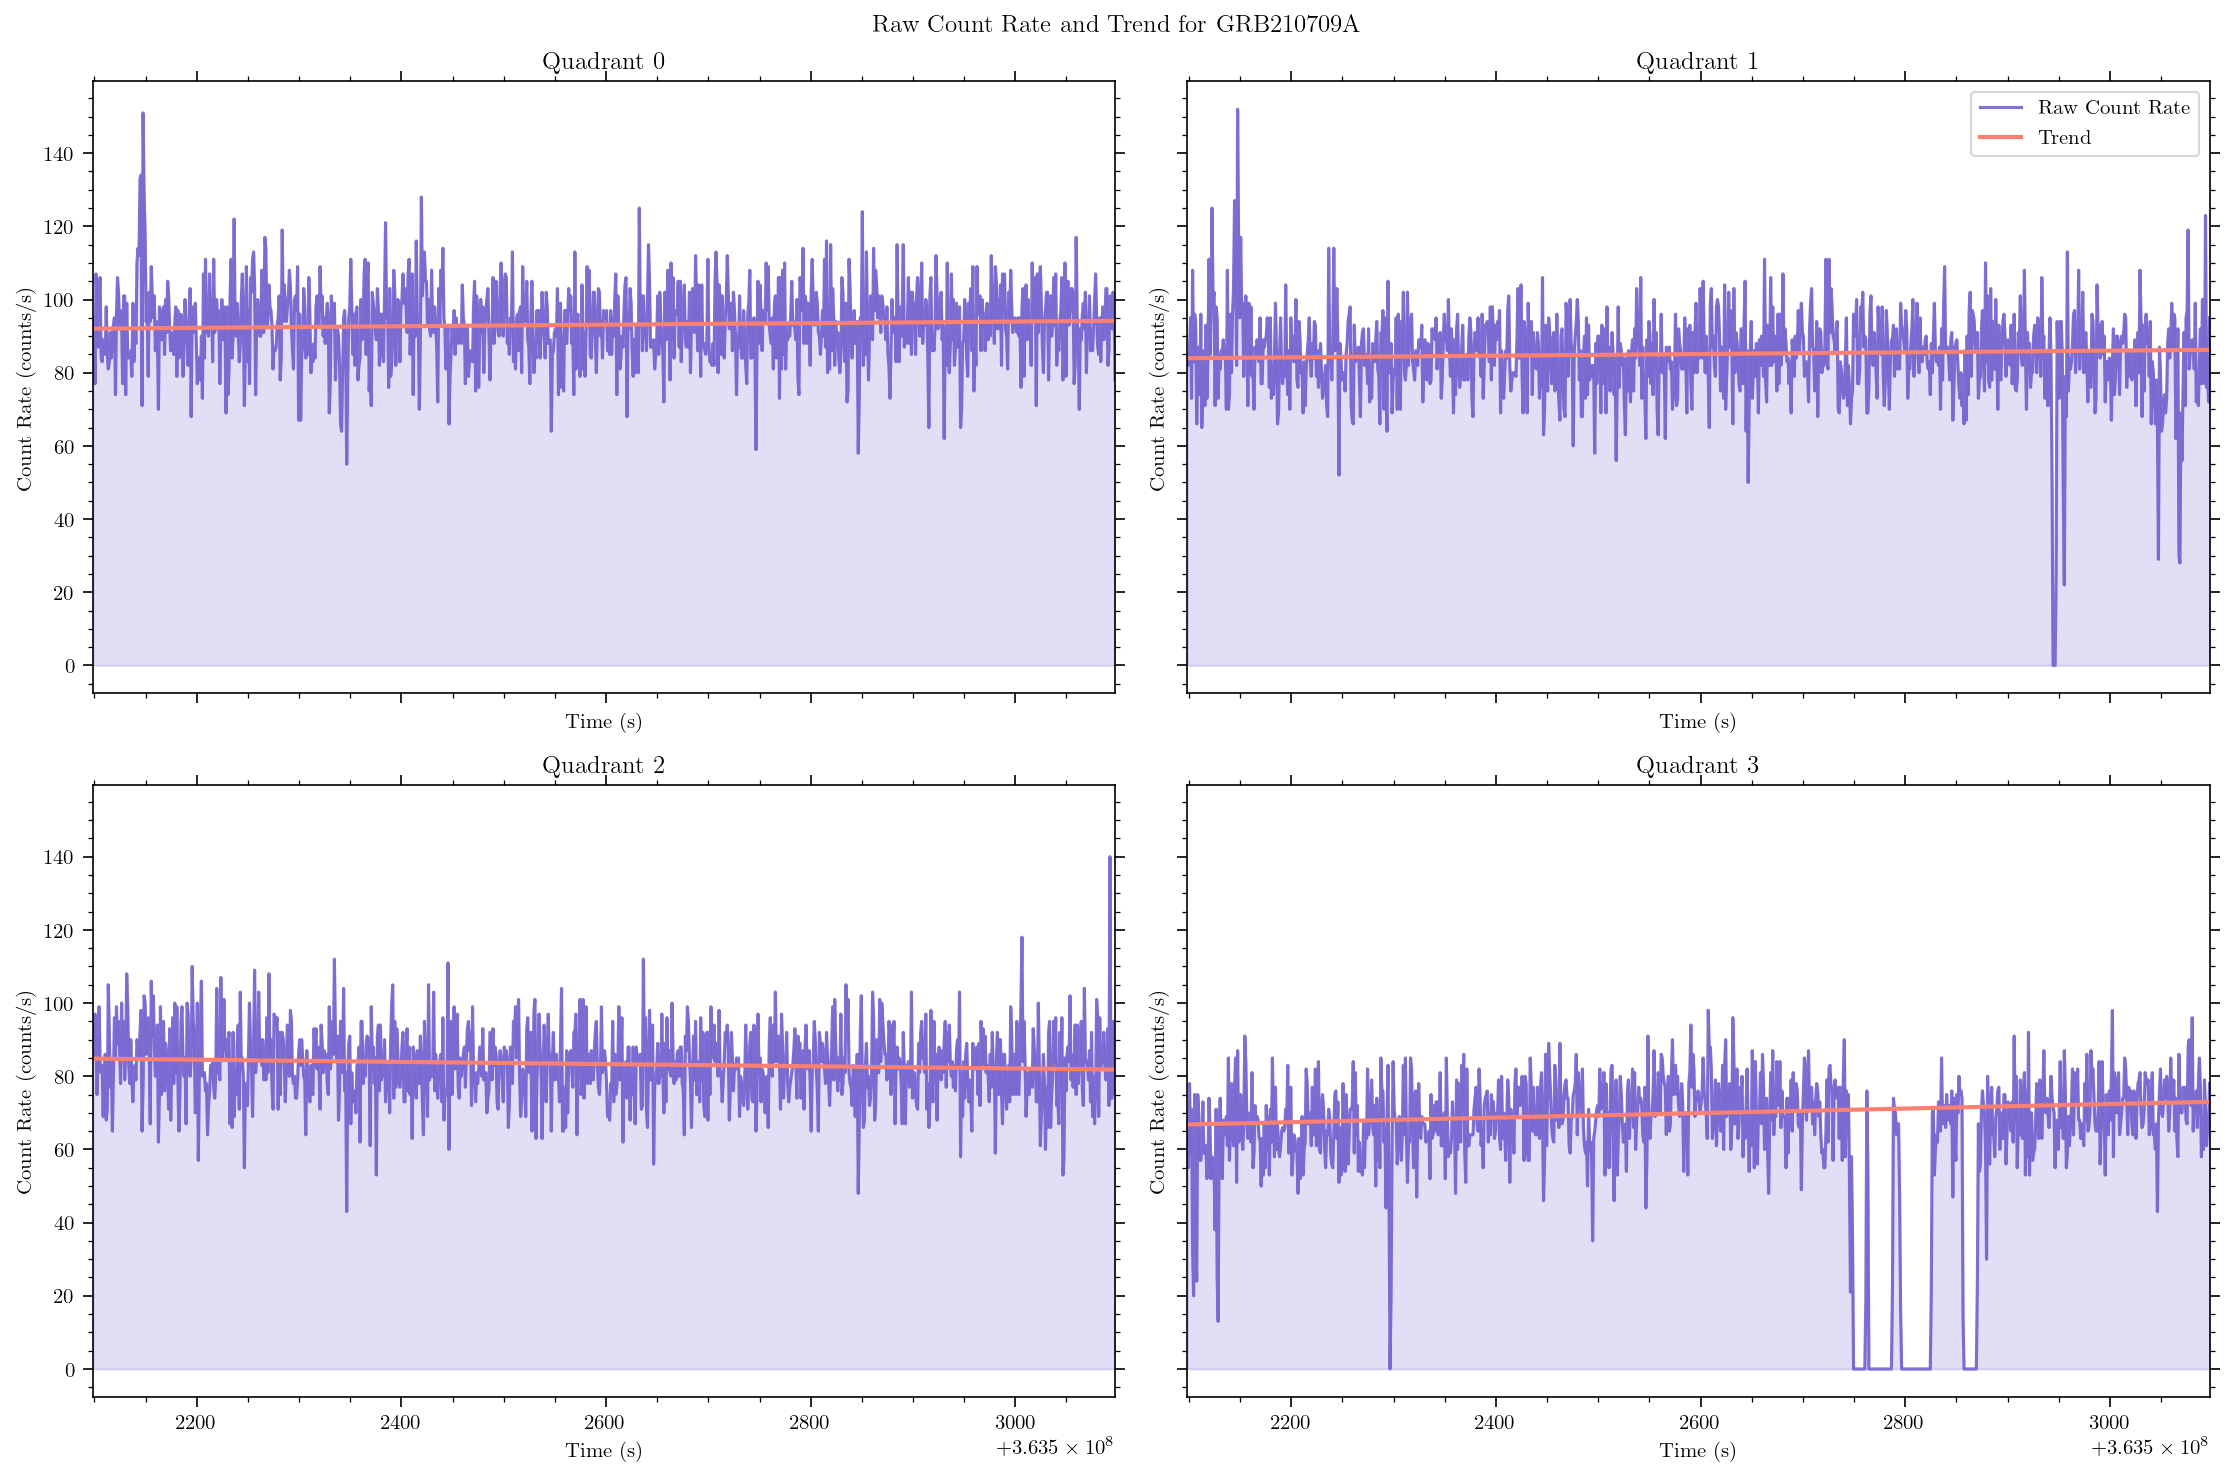

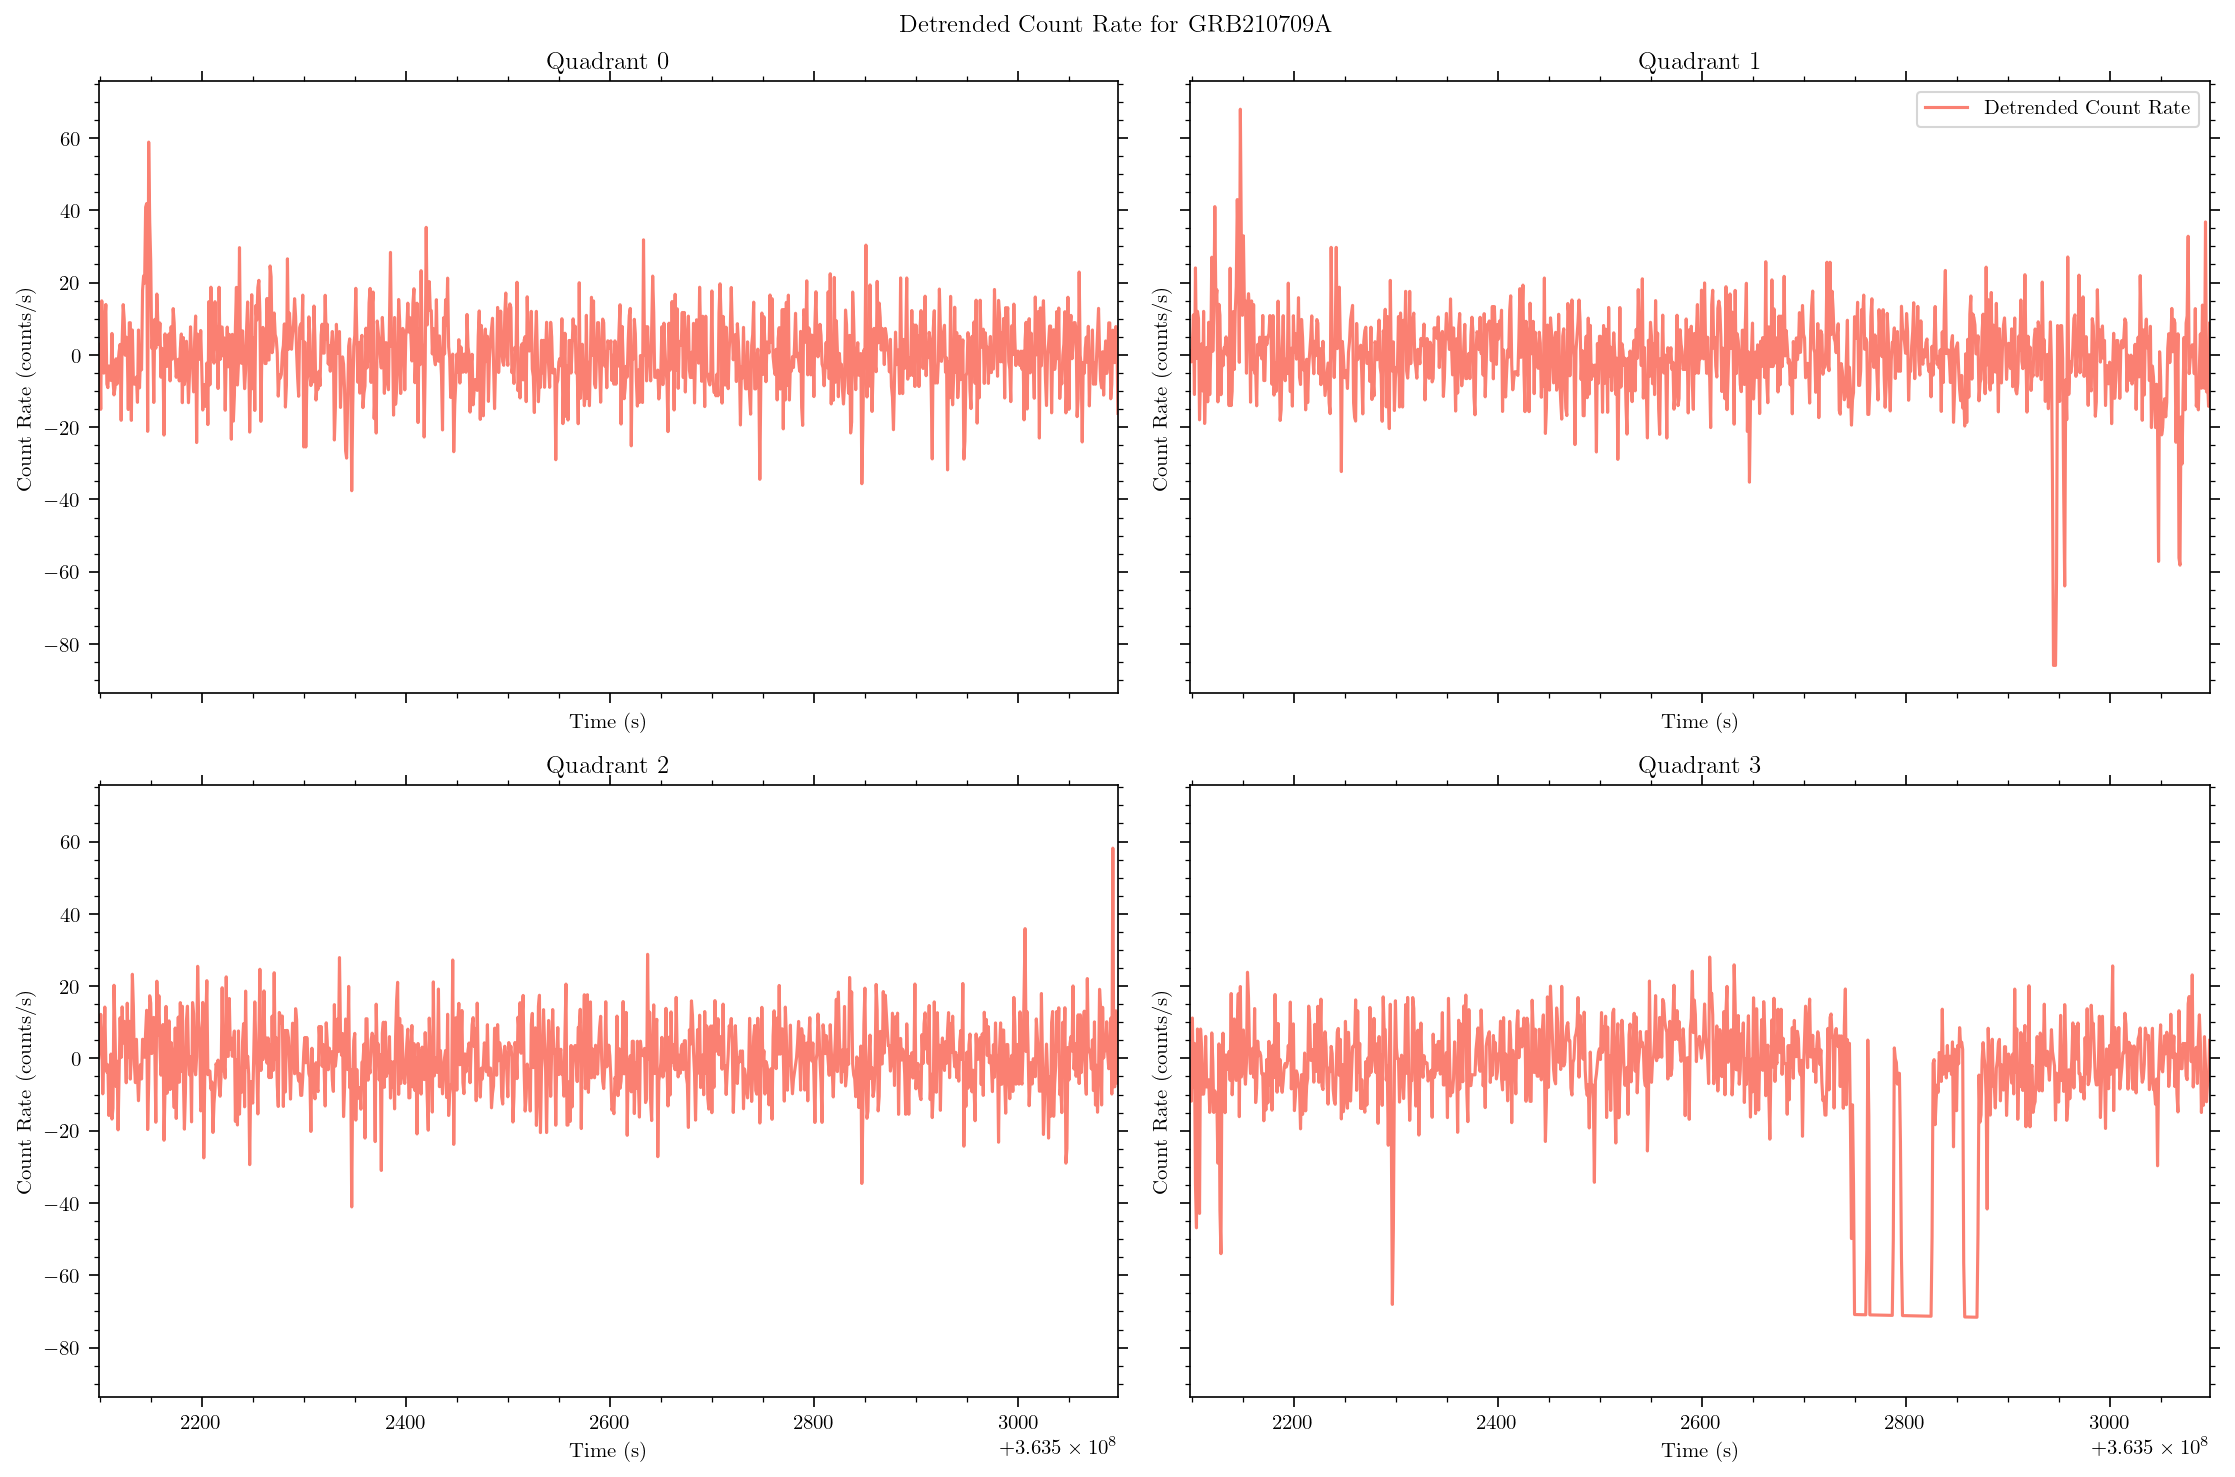

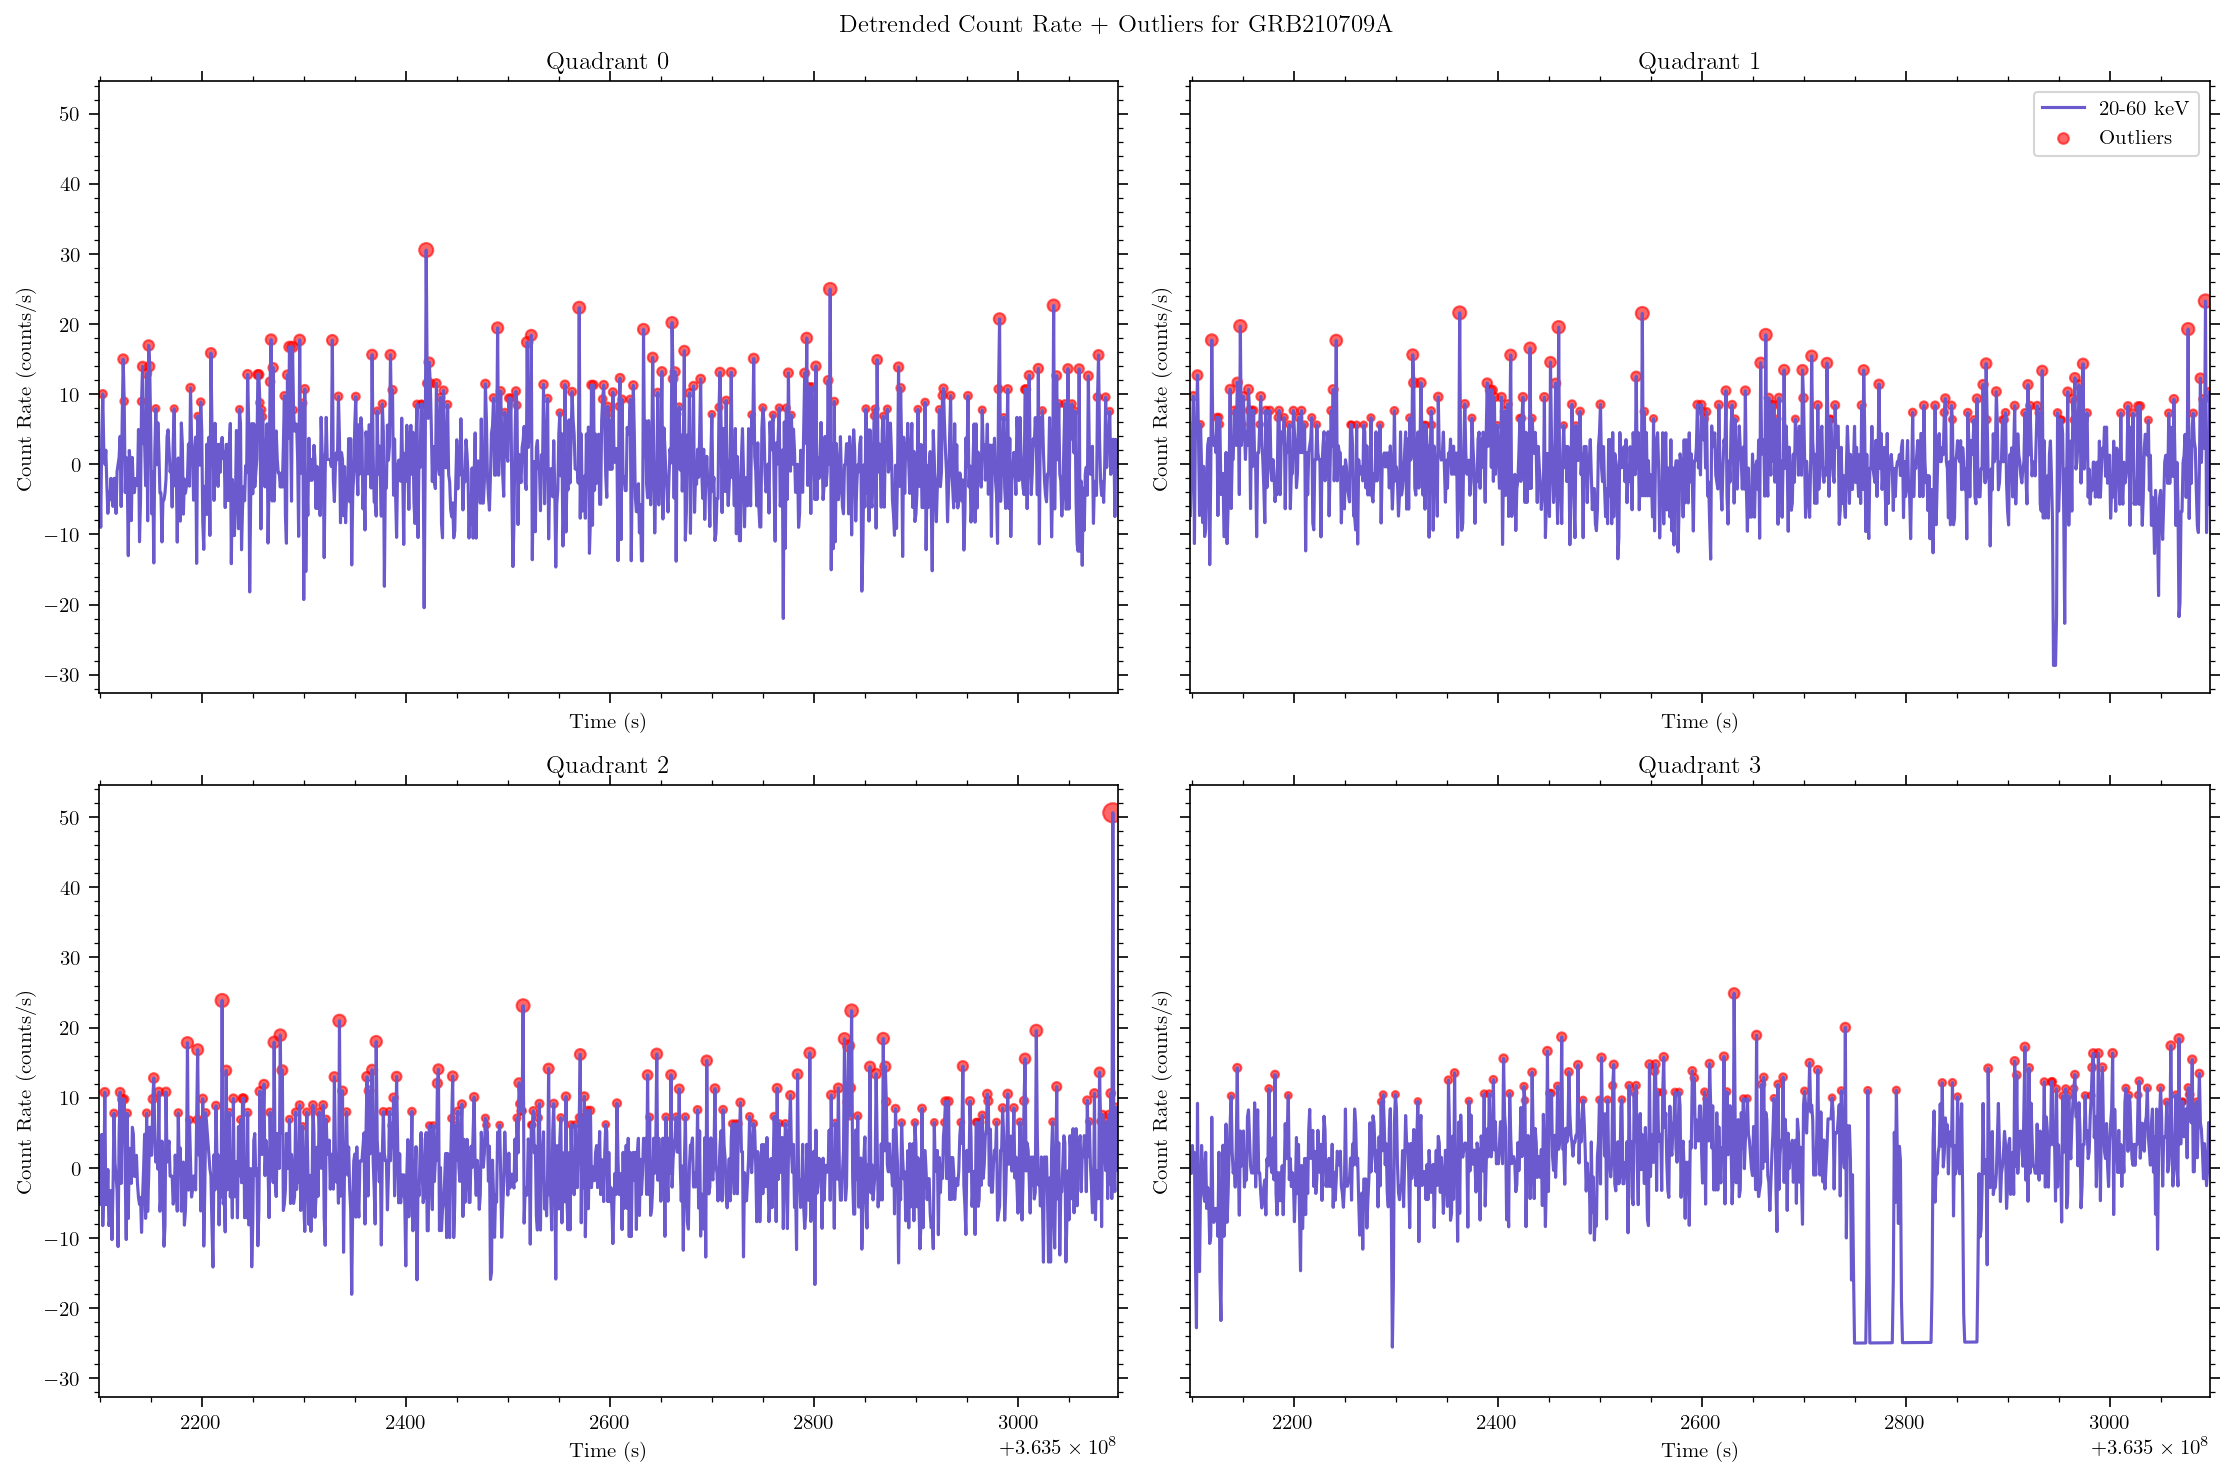

In [24]:
for trigger_time in trigger_times:
    grb_name = "GRB210709A"
    # trigger_time = 363503352.5
    results = fs.find_grb("/home/ravioli/astro/ksp/grb/GRB210709A/1s", trigger_time, 1)
    master_lcs = results[4]
    lc_paths = np.sort(glob.glob(f"{results[5][0]}/*.lc"))
    
    outlier_times = []
    for i in range(4):
        trigger_index = fs.get_trigger_index(master_lcs[i], trigger_time)
        detrended, raw, trend, *_ = fs.quadratic_detrend_trigger(master_lcs[i], trigger_index, polyorder=2)
        _, outliers, grb_mask, _ = results[i]
        quad_outlier_times = detrended['TIME'][outliers[grb_mask]]
        quad_outlier_times = np.concatenate((quad_outlier_times, quad_outlier_times+1, quad_outlier_times-1))
        outlier_times = np.concatenate((outlier_times, np.unique(quad_outlier_times)))
    u, c = np.unique(outlier_times, return_counts=True)
    u = u[c>1]
    counter = 0
    for i in range(4):
        trigger_index = fs.get_trigger_index(master_lcs[i], trigger_time)
        detrended, raw, trend, *_ = fs.quadratic_detrend_trigger(master_lcs[i], trigger_index, polyorder=2)
        detrended20to60, *_ = fs.quadratic_detrend_trigger(lc_paths[i], trigger_index, polyorder=2)
        snr, outliers, grb_mask, grb_snr = results[i]
        grb = np.zeros_like(detrended['RATE'])
        grb[outliers[grb_mask]] = grb_snr
        possible_grbs = np.intersect1d(u, detrended['TIME'][outliers[grb_mask]])
        if len(possible_grbs) > 0:
            matched_times_mask = np.isin(detrended['TIME'], possible_grbs)
            u_mask = np.isin(u, possible_grbs)
            print(f"Potential GRB found in Quadrant {i} at {u[u_mask][np.argmax(grb[matched_times_mask])]}s with SNR {np.round(max(grb[matched_times_mask]), 2)}!!!!")
            counter += 1
        if i==3:
            if counter > 1:
                plot_a_bunch_of_stuff(master_lcs, lc_paths, results, u, grb_name, trigger_time)
                print(f"Potential GRB found for trigger time {trigger_time}s.")
            else:
                print(f"No Potential GRB found for trigger time {trigger_time}s.")

Text(0.5, 1.0, 'GRB210730A - Quadrant 1')

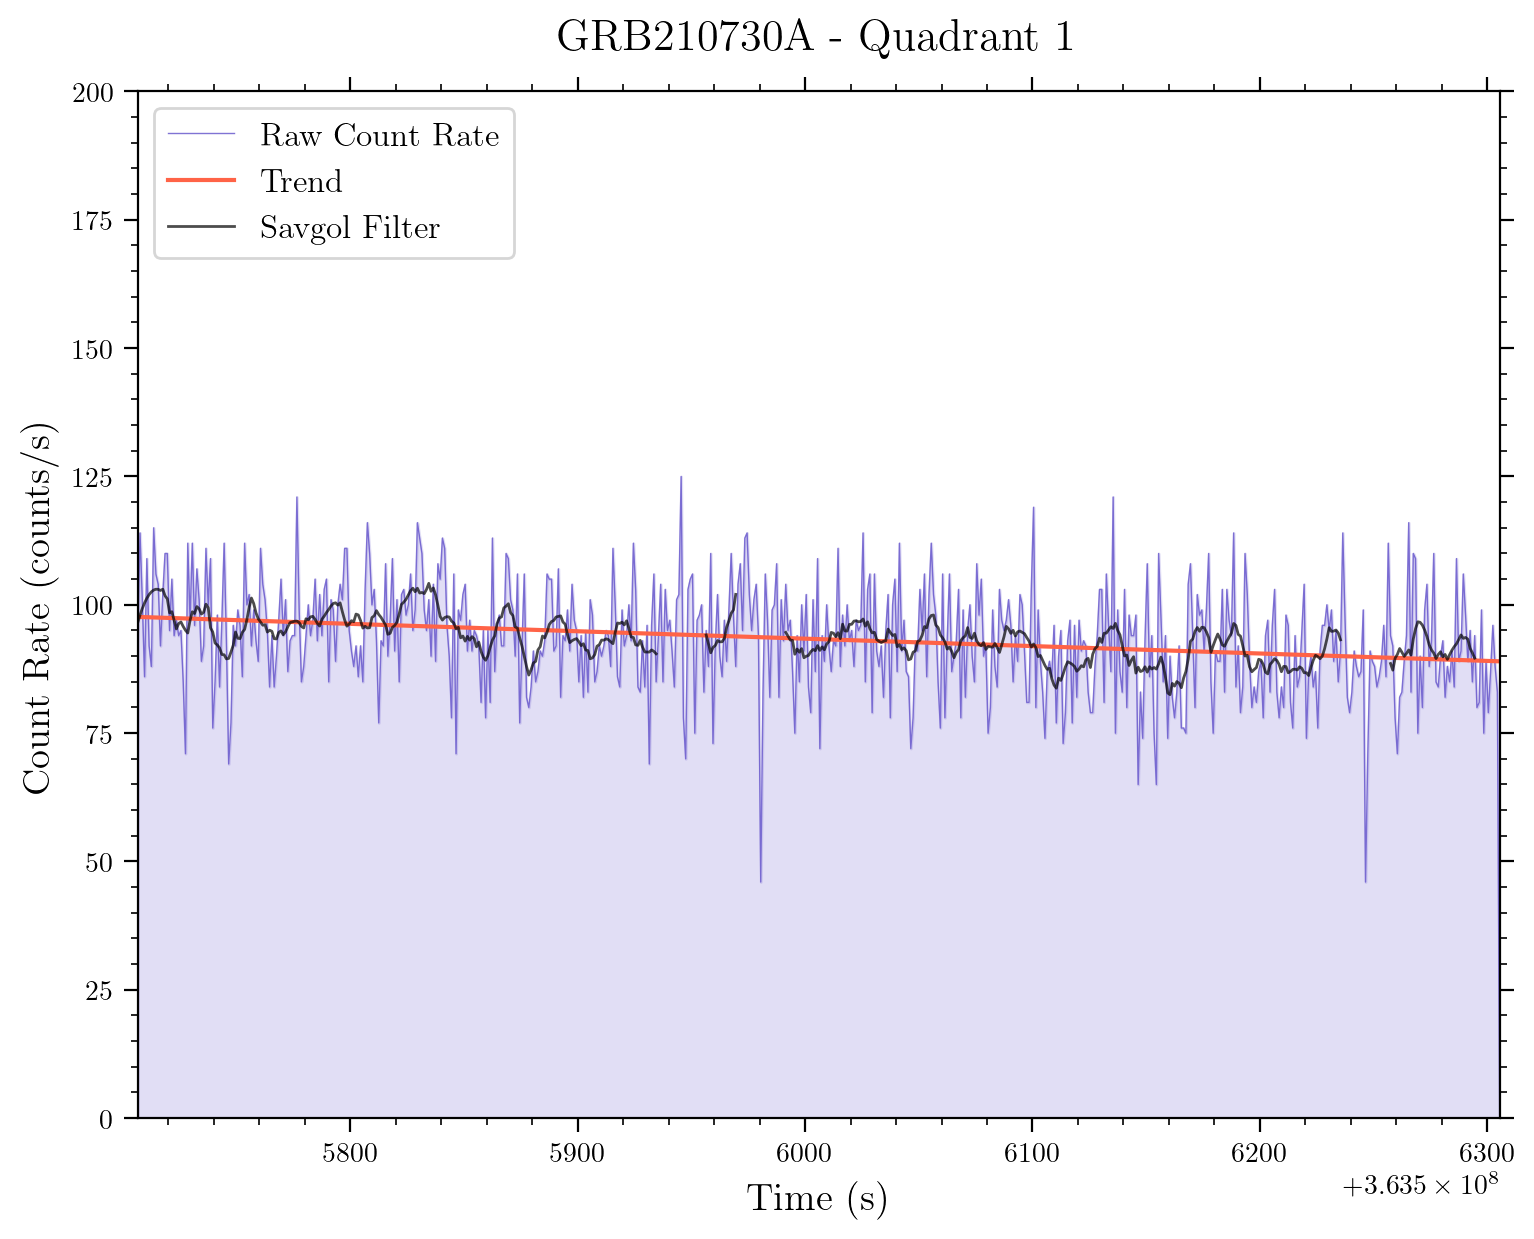

In [25]:
detrended, raw, trend, filtered, *_ = fs.quadratic_detrend_trigger(master_lcs[1], trigger_index, polyorder=2)
detrended20to60, *_ = fs.quadratic_detrend_trigger(lc_paths[1], trigger_index, polyorder=2)
plt.figure(figsize=(13.18/1.5, 10/1.5), dpi=200)
plt.plot(raw['TIME'], raw['RATE'], color='slateblue', label='Raw Count Rate', alpha=0.85, linewidth=0.5)
plt.plot(raw['TIME'], trend, color='tomato', label='Trend', linewidth=1.5)
plt.plot(raw['TIME'], filtered, color='black', label='Savgol Filter', alpha=0.7, linewidth=1)
plt.fill_between(raw['TIME'], 0, raw['RATE'], color='slateblue', alpha=0.2)
plt.legend(loc='upper left', fontsize=12)
plt.xlim(raw['TIME'][0], raw['TIME'][-1])
plt.ylim(0, 200)
plt.xlabel("Time (s)", fontsize=14, labelpad=5)
plt.ylabel("Count Rate (counts/s)", fontsize=14, labelpad=5)
plt.title("GRB210730A - Quadrant 1", fontsize=16, pad=15)

Text(0.5, 1.0, 'GRB160909A - Quadrant 1')

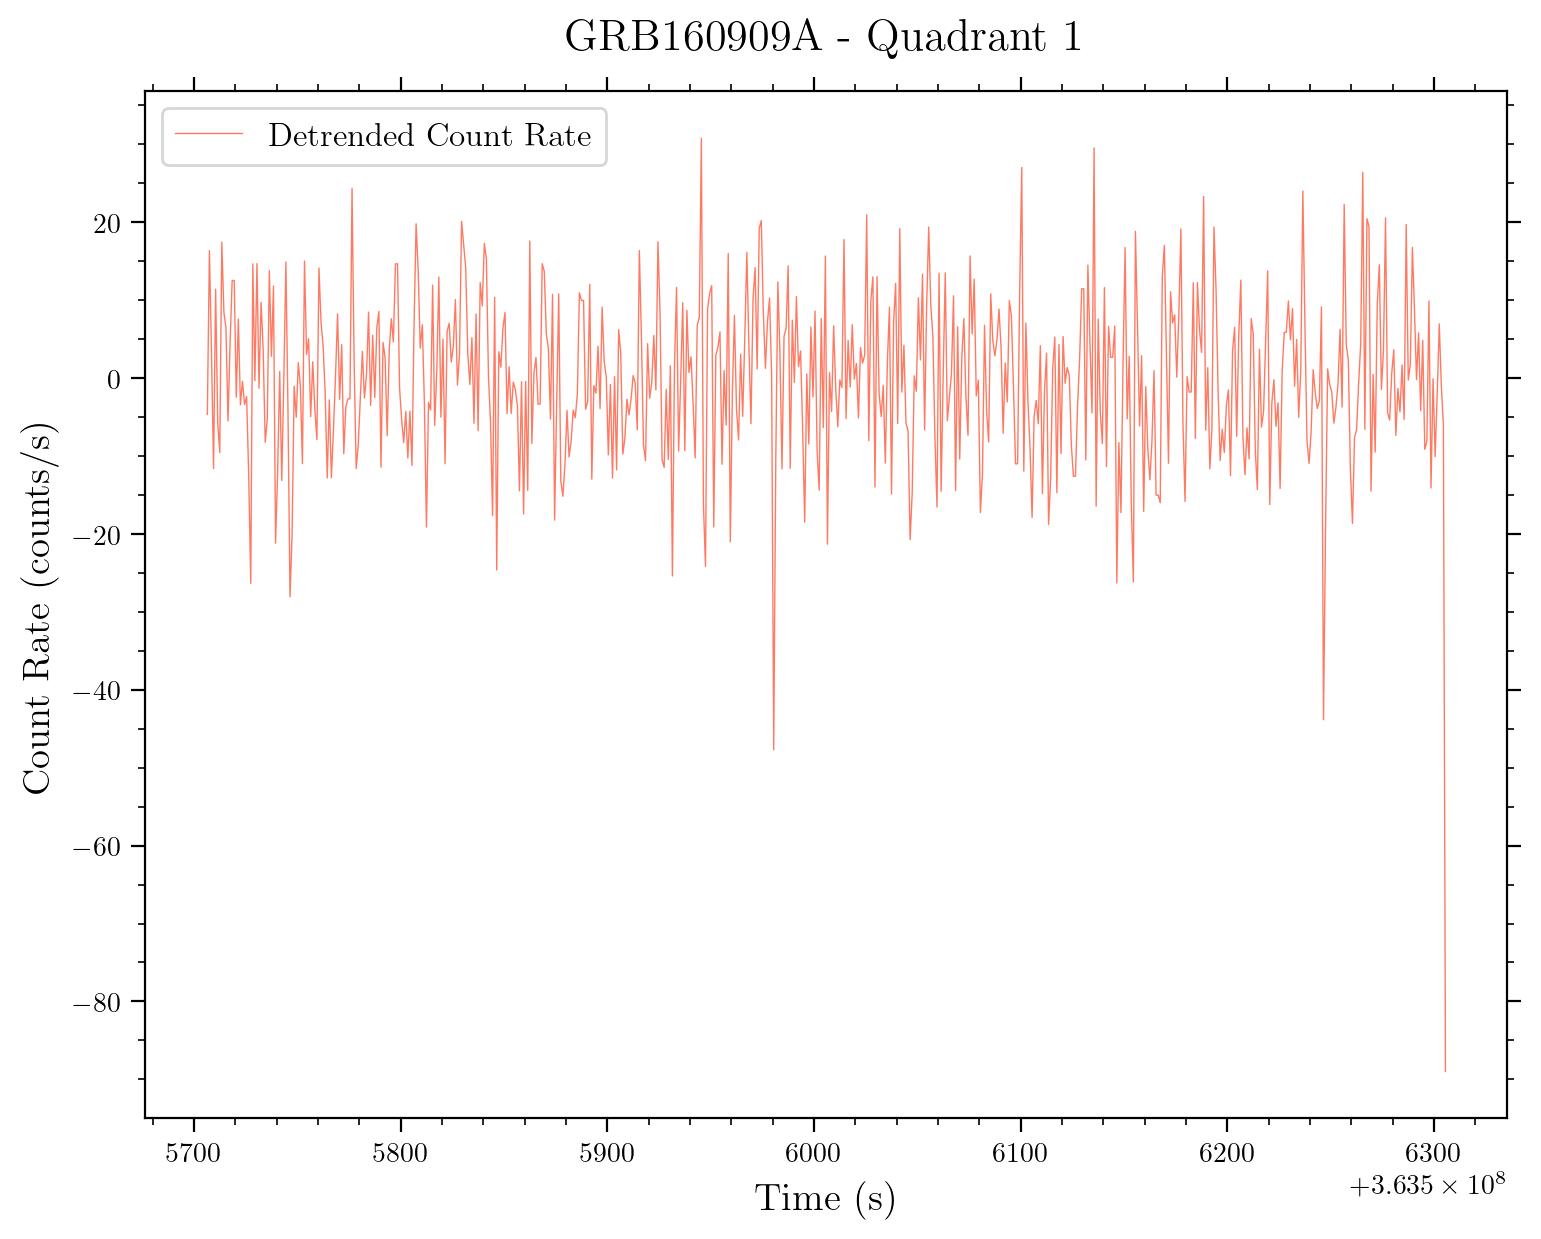

In [26]:
plt.figure(figsize=(13.18/1.5, 10/1.5), dpi=200)
plt.plot(detrended['TIME'], detrended['RATE'], color='tomato', label='Detrended Count Rate', alpha=0.85, linewidth=0.5)
plt.legend(loc='upper left', fontsize=12)
plt.xlabel("Time (s)", fontsize=14, labelpad=5)
plt.ylabel("Count Rate (counts/s)", fontsize=14, labelpad=5)
plt.title("GRB160909A - Quadrant 1", fontsize=16, pad=15)

Text(0.5, 1.0, 'GRB210709A - Quadrant 1')

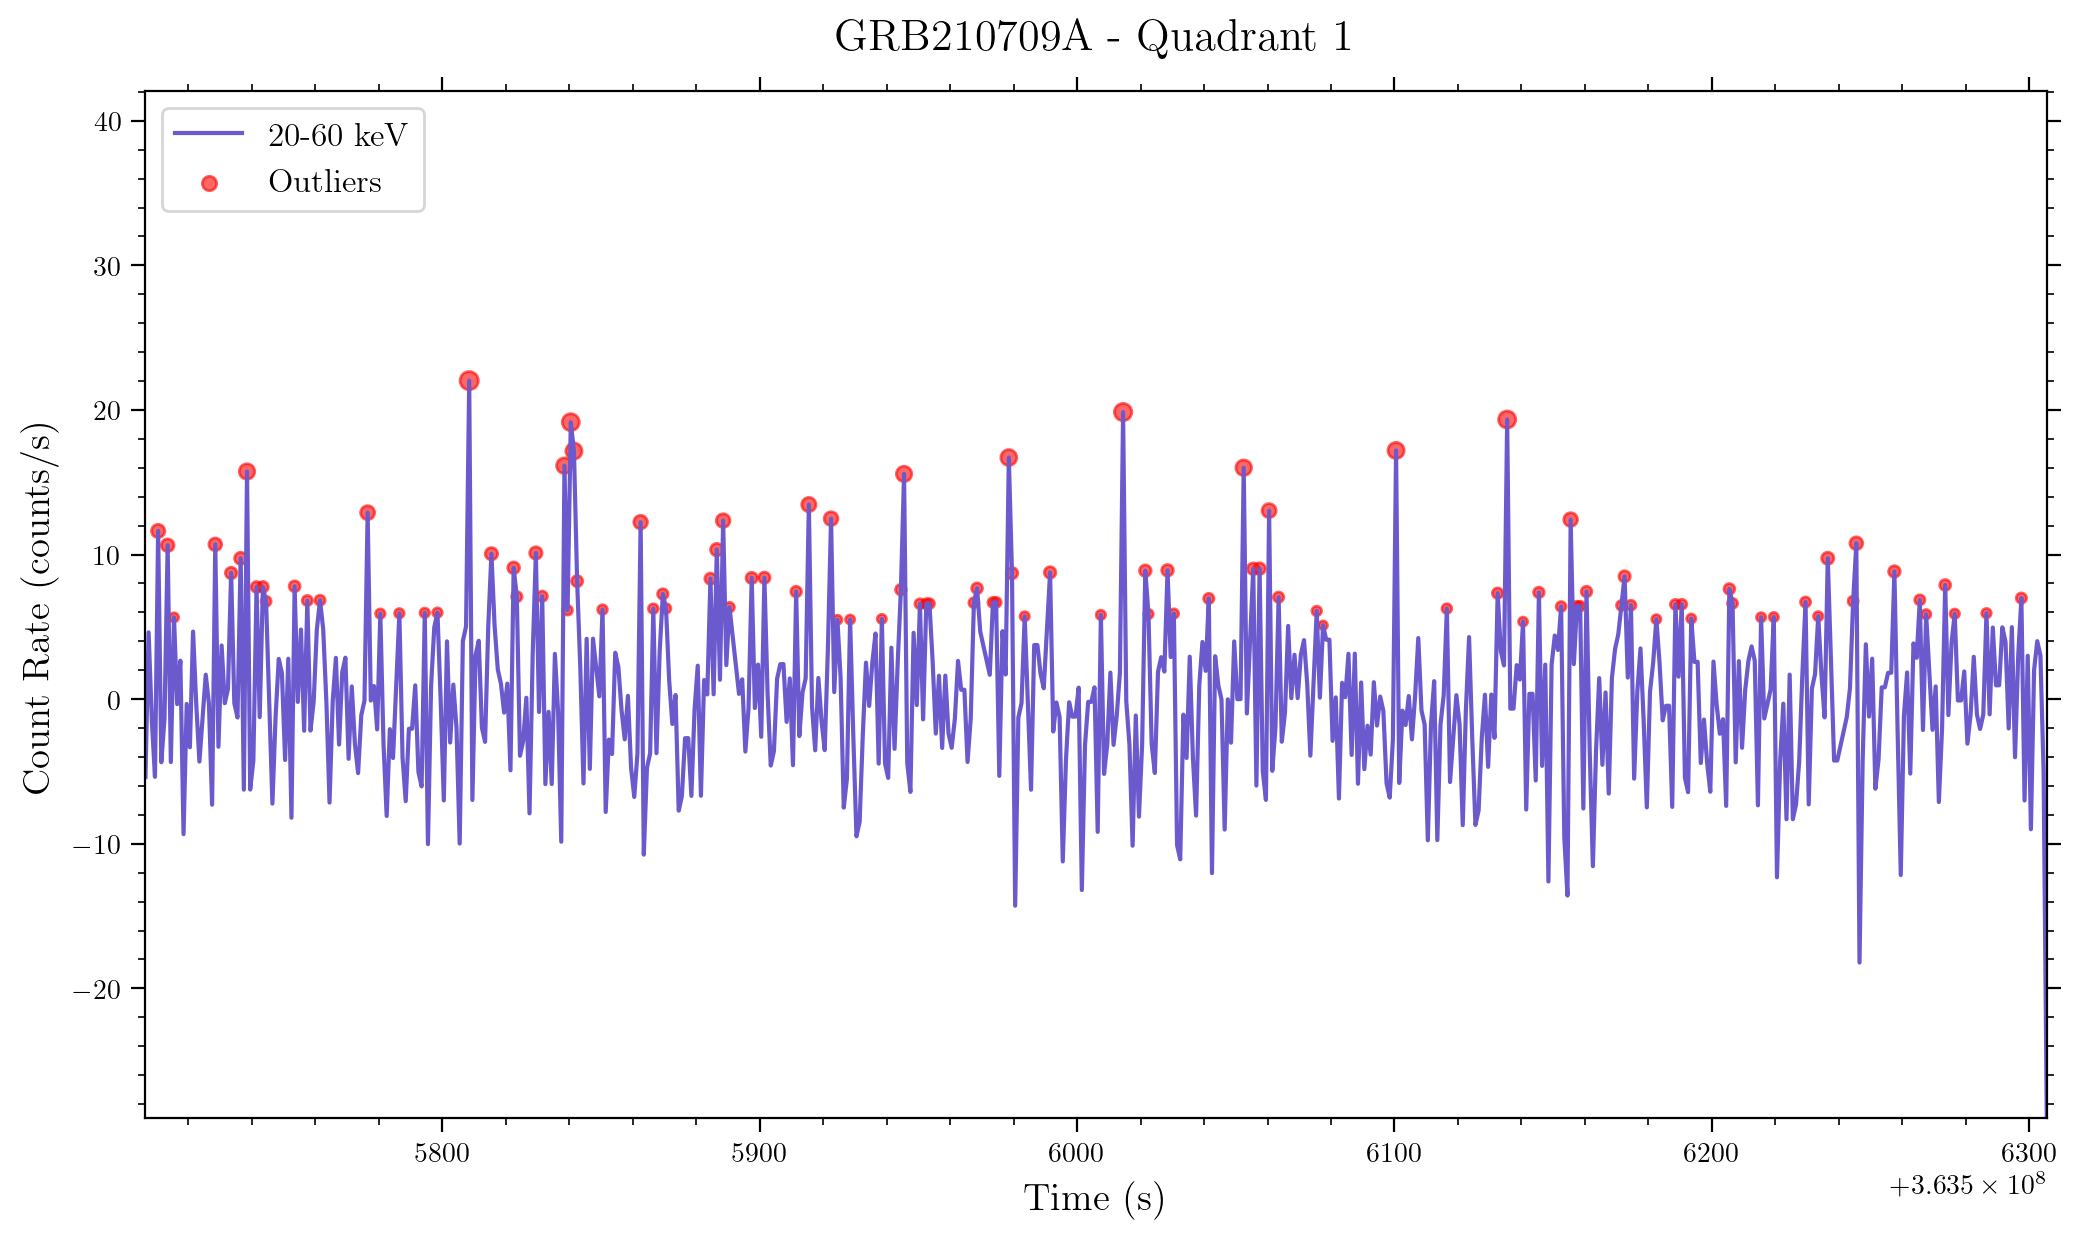

In [27]:
snr, outliers, grb_mask, grb_snr = results[1]
plt.figure(figsize=(18.4/1.5, 10/1.5), dpi=200)
plt.plot(detrended20to60['TIME'], detrended20to60['RATE'], color='slateblue', label='20-60 keV')
plt.scatter(detrended20to60['TIME'][outliers], detrended20to60['RATE'][outliers], color='red', alpha=0.6, s=10*snr[0], label='Outliers')
plt.xlim(detrended20to60['TIME'][0], detrended20to60['TIME'][-1])
plt.ylim(min(detrended20to60['RATE']), max(detrended20to60['RATE'])+20)
plt.legend(loc='upper left', fontsize=12)
plt.xlabel("Time (s)", fontsize=14, labelpad=5)
plt.ylabel("Count Rate (counts/s)", fontsize=14, labelpad=5)
plt.title("GRB210709A - Quadrant 1", fontsize=16, pad=15)

In [28]:
lc3bin1 = fs.quadratic_detrend_trigger("/home/ravioli/astro/ksp/grb/GRB190928A/1s/3_bins/20-60/AS1A06_002T02_9000003206_21631cztM0_level2_quad_clean_Q0.lc", 1802)[0]
lc3bin2 = fs.quadratic_detrend_trigger("/home/ravioli/astro/ksp/grb/GRB190928A/1s/3_bins/60-100/AS1A06_002T02_9000003206_21631cztM0_level2_quad_clean_Q0.lc", 1802)[0]
lc3bin3 = fs.quadratic_detrend_trigger("/home/ravioli/astro/ksp/grb/GRB190928A/1s/3_bins/100-200/AS1A06_002T02_9000003206_21631cztM0_level2_quad_clean_Q0.lc", 1802)[0]
grb_time = (307372000, 307373000)

Master light curve already exists at /home/ravioli/astro/ksp/grb/GRB190928A/1s/master_lc
Requested energy bins already exist at /home/ravioli/astro/ksp/grb/GRB190928A/1s/3_bins


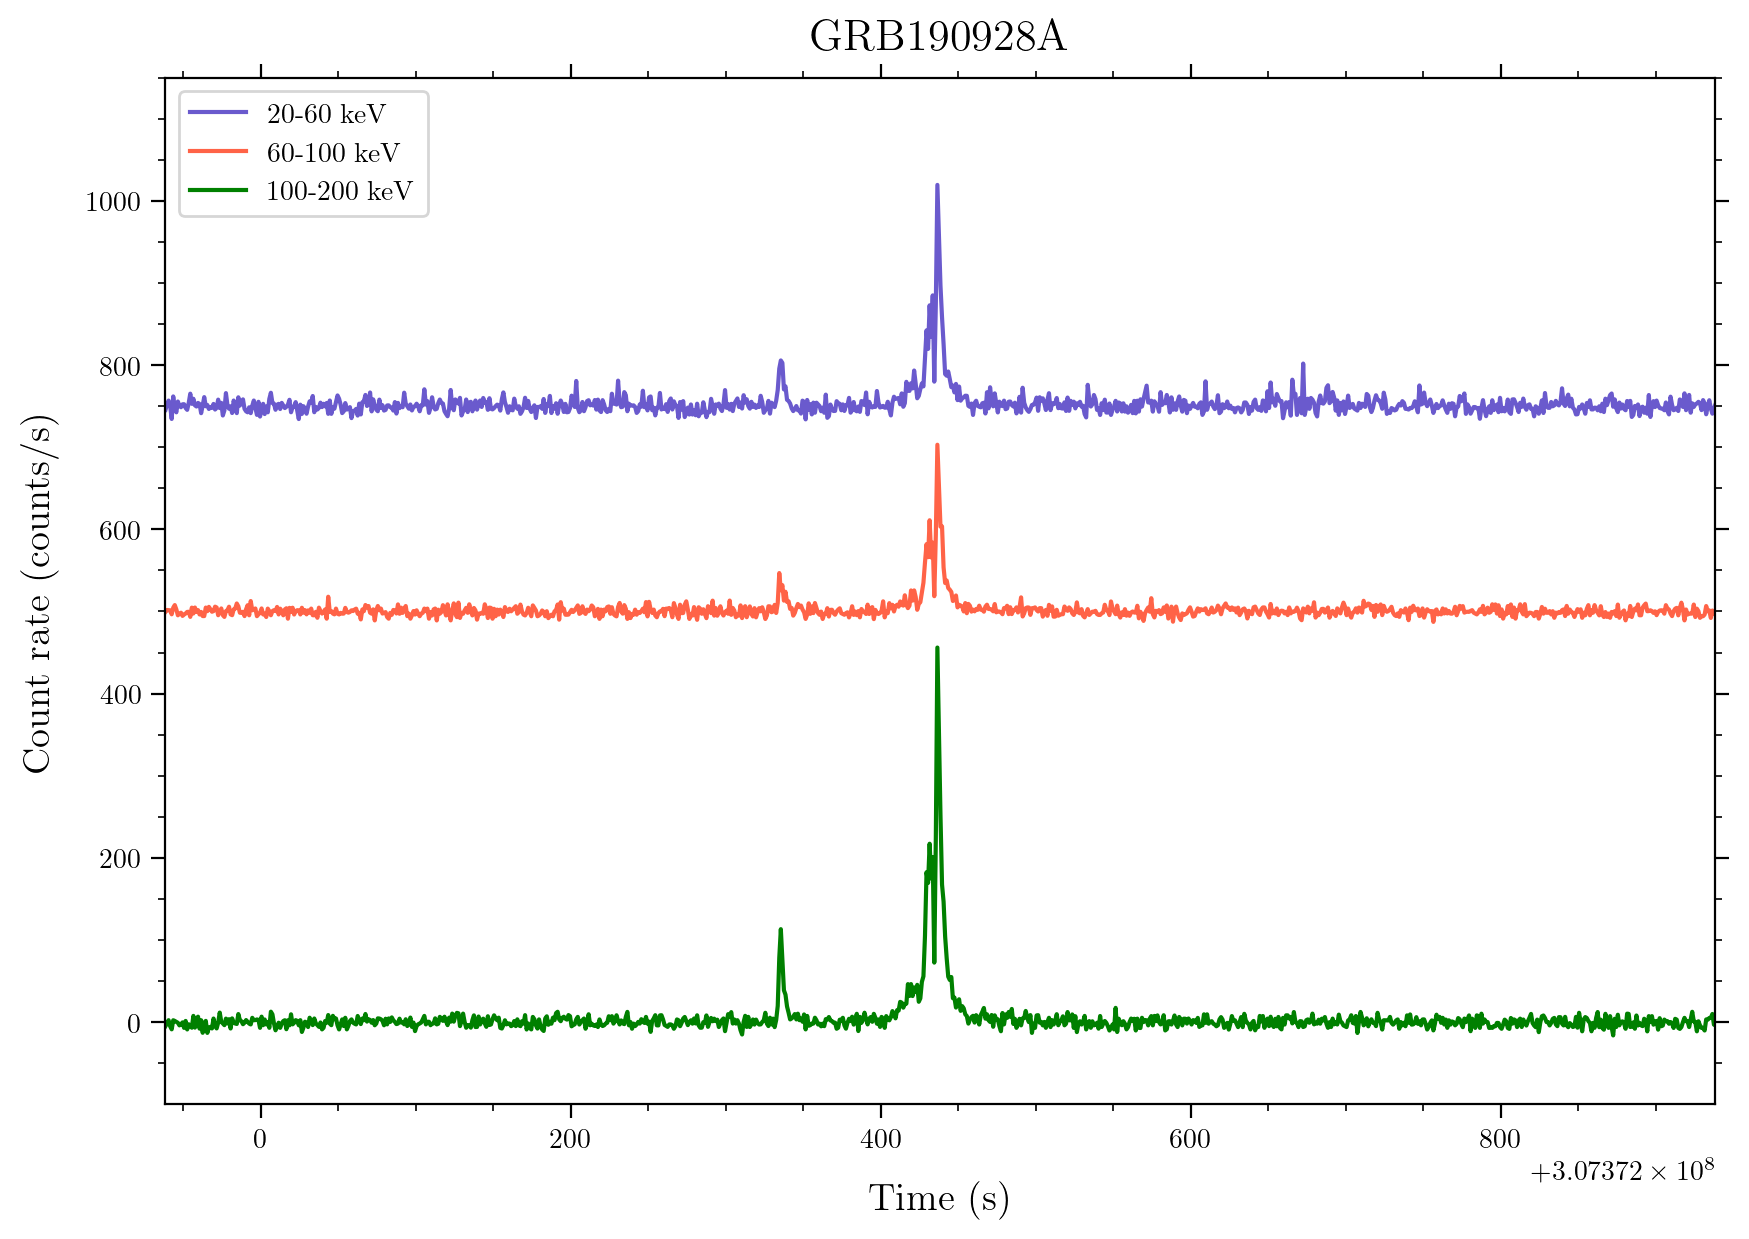

In [29]:
results = fs.find_grb("/home/ravioli/astro/ksp/grb/GRB190928A/1s", 307372437.0, 3)
outliers = results[0][1]
plt.figure(figsize=(15/1.5, 10/1.5), dpi=200)
plt.plot(lc3bin1['TIME'], lc3bin1['RATE']+750, color='slateblue', label='20-60 keV')
plt.plot(lc3bin2['TIME'], lc3bin2['RATE']+500, color='tomato', label='60-100 keV')
plt.plot(lc3bin3['TIME'], lc3bin3['RATE'], color='green', label='100-200 keV')
# plt.vlines(lc3bin1['TIME'][outliers], -100, 1200, linestyles='--', color='black', alpha=0.5, label="Outliers")
plt.xlim(lc3bin1['TIME'][0], lc3bin1['TIME'][-1])
plt.ylim(-100, 1150)
plt.xlabel("Time (s)", labelpad=10, fontsize=14)
plt.ylabel("Count rate (counts/s)", labelpad=10, fontsize=14)
plt.title("GRB190928A", pad=10, fontsize=16)
plt.legend(loc='upper left')